# **Car Price Prediction Using Linear Regression**

-------------

## **Objective: To develop and evaluate a linear regression model (Ordinary Least Sqaure) that accurately predicts car prices based on a given dataset.**

--------------

## **Import Library**

In [1]:
import pandas as pd
import numpy as np

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [3]:
# Use the raw URL link from GitHub
url = "https://raw.githubusercontent.com/Mharis64/OASIS_INFOBYTE-Projects/main/OASIS%20INFOBYTE%20Project%203/car%20data.csv"

car = pd.read_csv(url)

## **Explore Data**

**First Five Rows**

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Shape of the dataset**

In [5]:
car.shape

(301, 9)

**Information of the dataset**

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Describe the dataset**

In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


**Data Types in the dataset**

In [8]:
car.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

**Identifying Missing Values**

In [9]:
car.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [10]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## **Data Preprocessing**

In [11]:
# Adding Age Column
car['Age'] = 2024 - car['Year']
car.drop('Year', axis=1, inplace=True)

In [12]:
car.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


**Outlier Visualization**

<Axes: xlabel='Selling_Price'>

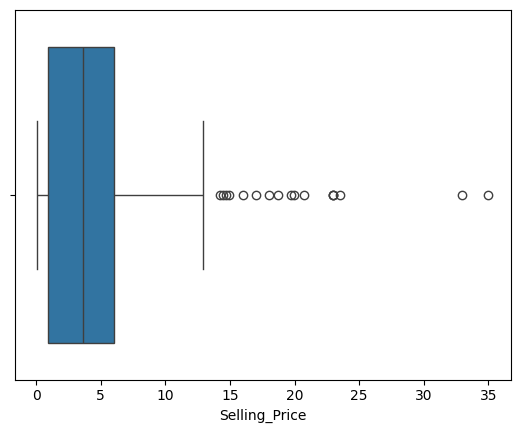

In [13]:
sns.boxplot(x='Selling_Price', data=car)

<Axes: xlabel='Age'>

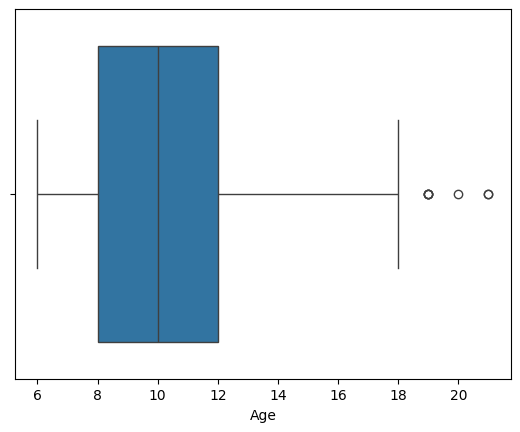

In [15]:
sns.boxplot(x='Age', data=car)

In [16]:
car1 = car.copy()
car1.shape

(301, 9)

In [17]:
car1.head(1)

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


In [18]:
numeric_cols = car1.select_dtypes(include=[float, int]).columns

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = car1[numeric_cols].quantile(0.25)
Q3 = car1[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

Selling_Price        5.1
Present_Price        8.7
Driven_kms       33767.0
Owner                0.0
Age                  4.0
dtype: float64

In [19]:
outliers = car1[((car1[numeric_cols] < (Q1 - 1.5 * IQR)) | (car1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,21
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,21
50,fortuner,14.90,30.61,104707,Diesel,Dealer,Automatic,0,12
51,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0,9
52,innova,18.00,19.77,15000,Diesel,Dealer,Automatic,0,7
53,fortuner,16.00,30.61,135000,Diesel,Individual,Automatic,0,11
54,innova,2.75,10.21,90000,Petrol,Individual,Manual,0,19
58,etios g,4.10,6.80,39485,Petrol,Dealer,Manual,1,10
59,fortuner,19.99,35.96,41000,Diesel,Dealer,Automatic,0,10
62,fortuner,18.75,35.96,78000,Diesel,Dealer,Automatic,0,10


In [20]:
out = car1[~((car1[numeric_cols] < (Q1 - 1.5 * IQR)) | (car1[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
car = out.copy()
car.shape

(264, 9)

## **Data Visualization**

In [37]:
car.Car_Name.value_counts()

Car_Name
city                      26
verna                     14
corolla altis             13
brio                      10
ciaz                       9
                          ..
Activa 4g                  1
Honda CB Unicorn           1
Hero Honda CBZ extreme     1
Honda Karizma              1
Honda Dream Yuga           1
Name: count, Length: 89, dtype: int64

<ipython-input-40-44031741e299>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Selling_type', y='Selling_Price', data=car, palette='muted')
<ipython-input-40-44031741e299>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
<ipython-input-40-44031741e299>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type', y='Selling_Price', data=car, palette='muted')


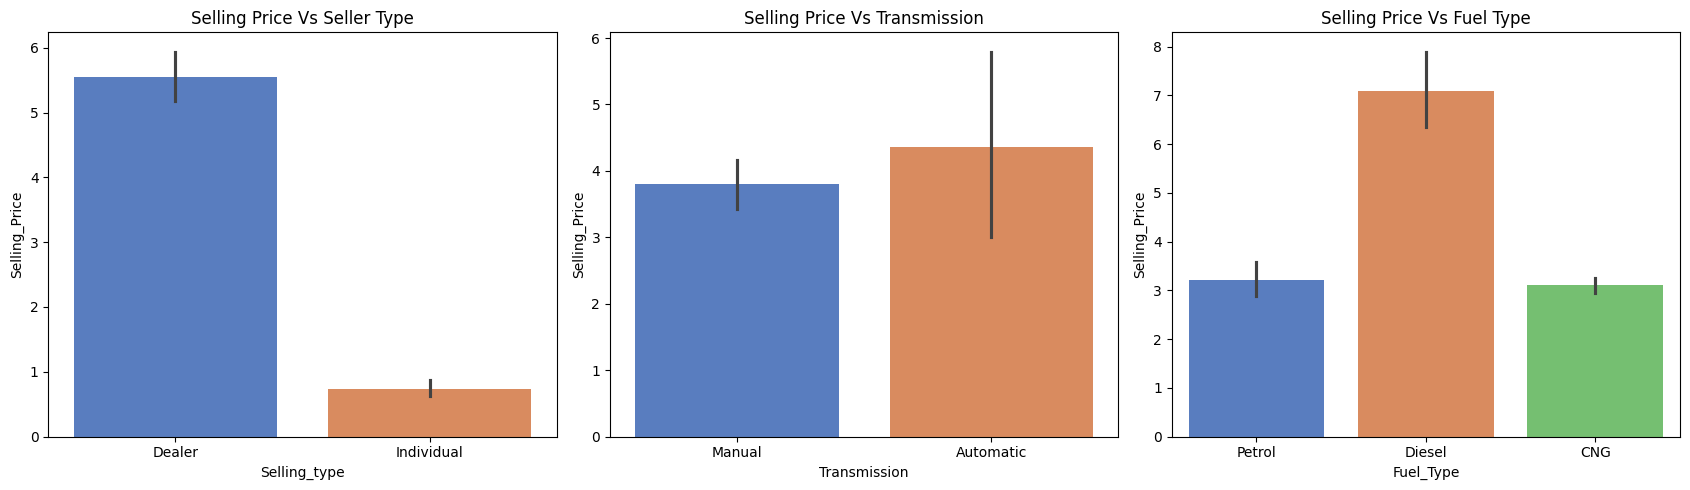

In [40]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(x='Selling_type', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(x='Transmission', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car, palette='muted')
plt.title('Selling Price Vs Fuel Type')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

<ipython-input-41-3501a3aee2cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')


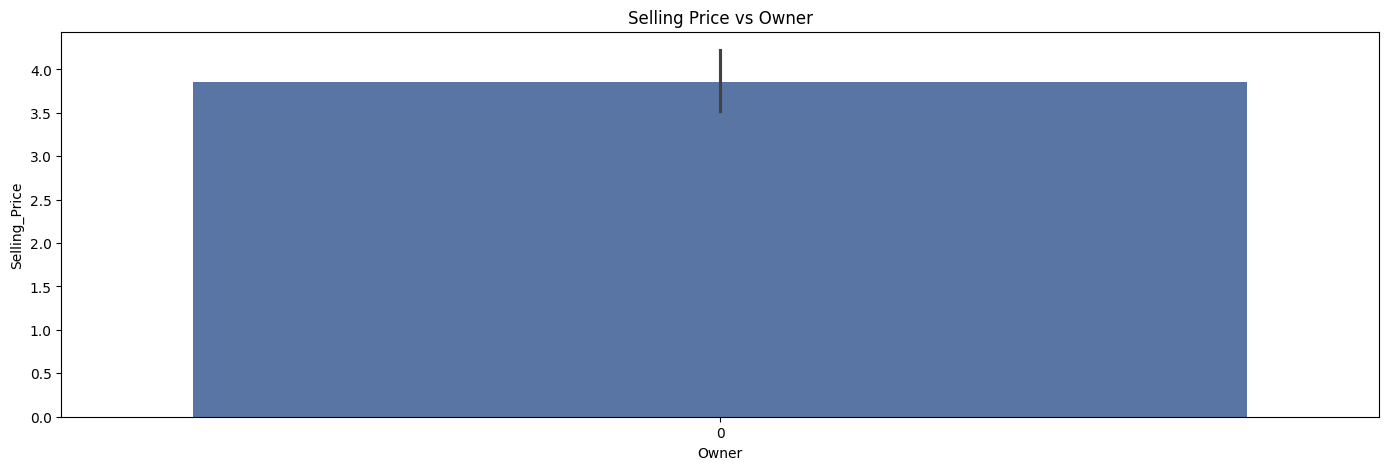

In [41]:
#Selling_Price and Owner Visualization with target variable
plt.figure(figsize=[17,5])
sns.barplot(x='Owner', y='Selling_Price', data=car, palette='deep')
plt.title('Selling Price vs Owner')
plt.show()

<ipython-input-42-0d440da1fd2d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')


<Axes: xlabel='Age', ylabel='Selling_Price'>

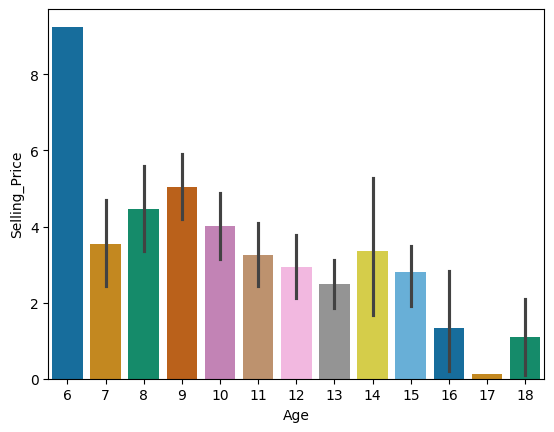

In [42]:
sns.barplot(x='Age', y='Selling_Price', data=car, palette='colorblind')

**Encoding of Categorical Features**

In [43]:
car.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [47]:
car.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4}},inplace=True)
car['Fuel_Type'].unique()

array([0, 1, 2])

In [49]:
car.replace({'Selling_type':{'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}},inplace=True)
car['Selling_type'].unique()

array([1, 0])

In [50]:
car.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)
car['Transmission'].unique()

array([0, 1])

In [51]:
car.replace({'Owner':{'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
car['Owner'].unique()

array([0])

In [52]:
car.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,1,0,0,10
1,sx4,4.75,9.54,43000,1,1,0,0,11
2,ciaz,7.25,9.85,6900,0,1,0,0,7
3,wagon r,2.85,4.15,5200,0,1,0,0,13
4,swift,4.60,6.87,42450,1,1,0,0,10


**Correlation Visualization**

In [ ]:
sns.heatmap(corr_matrix, annot=True)

## **Define Target Variable (y) and Feature Variables (X)**

In [61]:
car.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [62]:
Y = car['Selling_Price']
X = car.drop('Selling_Price', axis=1)

## **Train Test Split**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2529)

In [28]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((184, 8), (80, 8), (184,), (80,))

## **Modeling**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [67]:



# Ensure X_train and Y_train have the same length
X_train = X_train.loc[Y_train.index]

# Now you can fit the model
model.fit(X_train, Y_train)


LinearRegression()

In [68]:
model.intercept_

2.502778468019666

In [69]:
model.coef_

array([ 2.69384364e-01, -1.55098360e-05, -3.85025345e-13, -4.44194039e-01,
       -4.73704639e-01,  9.16862927e-01,  1.24035130e-01,  8.81769794e-01,
        1.44547108e+00,  1.16449446e+00,  2.56327912e+00,  3.46591317e+00,
        2.06043386e+00,  6.35009390e-01,  4.15306624e+00,  1.29505775e+00,
        1.54423770e+00,  3.38823002e+00,  2.70600791e+00,  3.94676111e-01,
        6.68671140e-01, -3.64501606e-01,  4.34310767e-01,  3.19860712e+00,
        1.57807719e+00,  1.06494459e+00,  1.77753847e+00,  1.41563561e+00,
       -1.40249382e-01,  2.58943932e+00,  6.24368761e-01,  1.32834416e+00,
        1.15173378e+00,  6.63906934e-01,  1.38454471e+00,  3.13205048e+00,
        1.92466884e+00,  1.10312796e+00,  3.36449070e+00,  1.93345840e+00,
        1.86808790e+00,  1.08070773e+00, -3.55987442e-02,  2.80401339e+00,
        6.23267813e-01,  5.97490658e-01,  1.08850353e+00,  1.87451885e+00,
        7.63304593e-01,  1.11143615e+00,  1.09432076e+00,  2.26677509e+00,
        3.10896992e+00,  

## **Prediction**

In [71]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Y_pred = model.predict(X_test)

In [72]:
Y_pred

array([ 1.54693647e+00,  1.83085524e+00,  1.01710813e+00, -3.96854382e-01,
        1.18896049e+00, -5.71394533e-01, -1.60948296e+00, -3.38806495e+00,
       -5.45785830e-01, -9.45984604e-01, -4.18744914e-01, -2.38181094e+00,
       -1.12244399e+00, -1.62541124e+00, -2.30074031e-01, -1.26946082e+00,
       -2.20900947e+00, -1.09590035e+00, -7.64883212e-01,  1.69297017e+00,
       -1.40120830e+00, -1.67288472e-02, -2.79508761e+00, -8.20875941e-01,
       -3.42228740e-01,  1.18896049e+00, -1.69696115e+00, -6.94065818e-04,
       -1.66988639e+00,  8.55099503e-01, -6.72119466e+00, -4.80352076e-01,
        8.77891839e-01, -1.36264008e+00, -1.14546307e+00, -1.19427980e+00,
       -6.64328689e-01,  1.10211775e+00,  8.94381308e-01, -2.21508304e-01,
       -2.76248734e+00, -2.23771278e+00, -3.41875092e+00, -2.96243196e+00,
       -1.39653534e+00, -1.63840664e+00, -1.56663803e+00,  7.32880111e-01,
        1.02962225e+00,  1.09950453e+00,  2.13587952e+00, -1.95527878e+00,
       -2.55640947e+00, -

In [ ]:
Y_pred.shape

## **Model Evaluation**

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
MSE = mean_squared_error(Y_test, Y_pred)
print('Test Mean Squared Error for test data: ', MSE)

Test Mean Squared Error for test data:  27.15281487002297


In [74]:
MAE = mean_absolute_error(Y_test, Y_pred)
print('Test Mean Absolute Error for test data: ', MAE)

Test Mean Absolute Error for test data:  4.76665985284744


In [75]:
R2 = r2_score(Y_test, Y_pred)
print('Test R2 Score for test data: ', R2)

Test R2 Score for test data:  -1.9019861335805484


## **Actual vs Predicted Results**

In [76]:
result = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
result

,Actual,Predicted
0,9.50,1.546936
1,9.70,1.830855
2,9.65,1.017108
3,4.40,-0.396854
4,7.75,1.188960
...,...,...
75,6.15,-0.549086
76,5.95,0.478891
77,6.45,-0.375486
78,4.50,-0.607770


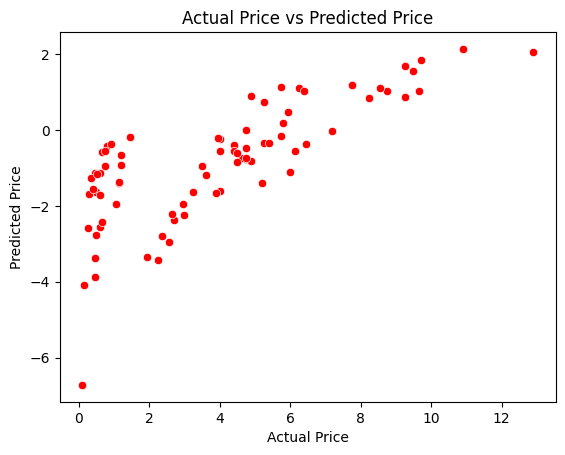

In [77]:
sns.scatterplot(x=Y_test, y=Y_pred,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()